# PDF scraper example

This notebook scrapes data using the following libraries
- [pdfplumber](https://github.com/jsvine/pdfplumber)
- pandas

In this file, we will first inspect the pdf and then extract two values from multiple pdfs. 

In [1]:
# —————— libraries that need to be installed, which you can do via pip ———————

import pdfplumber # to scrape pdfs, documentation: https://github.com/jsvine/pdfplumber
import pandas as pd # to use pandas to process data

# —————— libraries built into Python ———————
import csv # to write and read csv
import glob # to access file paths

## Inspect the document for patterns
Just like with websites, we should inspect the document we want to scrape.

In [2]:
## get the path for one document
'../data/crime-reports/21-000257- Incident Report- LVo.pdf'

'../data/crime-reports/21-000257- Incident Report- LVo.pdf'

PDFplumber turns your document into an object that you can query in different ways. Below is a function that does that:

In [3]:
pdfplumber.open('../data/crime-reports/21-000257- Incident Report- LVo.pdf')

In order to inspect the page we can use the `.open()` function and the `.pages` parameter

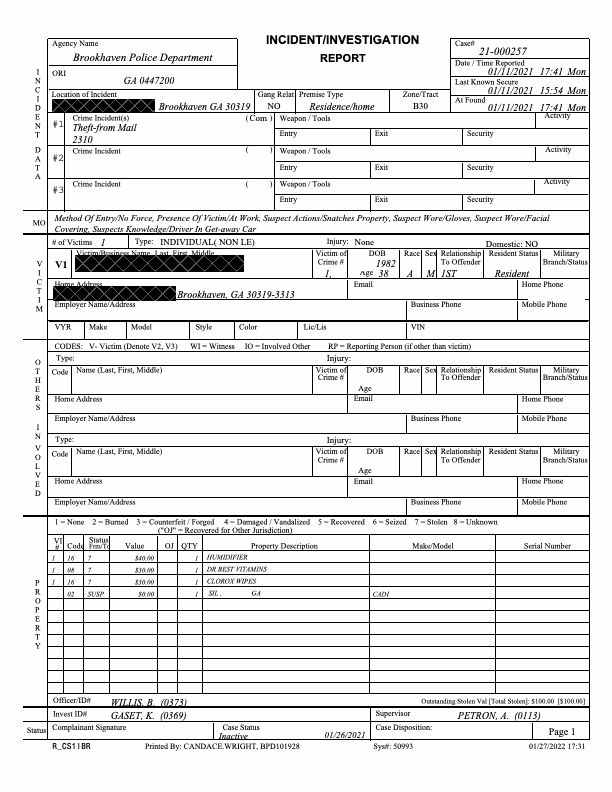

In [4]:
first_page = pdfplumber.open('../data/crime-reports/21-000257- Incident Report- LVo.pdf').pages[0]
first_page.to_image()

Using the `.extract_table()` function we can extract tables on this page

In [5]:
first_page.extract_table()

[['Agency Name\nBrookhaven Police Department',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'Case#\n21-000257',
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'Date / Time Reported\n01/11/2021 17:41 Mon',
  None,
  None,
  None,
  None,
  None,
  None],
 ['ORI\nGA 0447200',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  N

In [6]:
tables = first_page.extract_table()
len(tables)

45

### Scrape information

The notebook grab the following information:
- case number
- crime incidents

Let's start by looking at the first table:

In [7]:
tables[0]

['Agency Name\nBrookhaven Police Department',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Case#\n21-000257',
 None,
 None,
 None,
 None,
 None,
 None]

There are a lot of `None` values in this table. Let's take them out:

In [8]:
clean_table = list(filter(lambda x: x is not None, tables[0]))
clean_table

['Agency Name\nBrookhaven Police Department', 'Case#\n21-000257']

Now we need to clean the data. We can do that with the `.split()` function which requires a argument that usually is a character or set of characterw that it uses to split a string. We can split each item through the `"\n"` characters which, in coding, stands for new line: 


In [9]:
#first we grab the first item, then we split it where there is a "\n"
clean_table[0].split("\n")
    

['Agency Name', 'Brookhaven Police Department']

To grab the second item, we use the brackets `[1]`:

In [10]:
clean_table[0].split("\n")[1]

'Brookhaven Police Department'

We can grab the case number in the same way:

In [11]:
clean_table[1].split("\n")[1]

'21-000257'

### Now let's put this into a table

These are the steps:
- we set temporary variables
- put them into an array

In [12]:

row = {
    "agency":clean_table[0].split("\n")[1],
    "case_number":clean_table[1].split("\n")[1]
}

Then add the row into an empty array:

In [13]:
rows =[]
rows.append(row)

In [14]:
rows

[{'agency': 'Brookhaven Police Department', 'case_number': '21-000257'}]

### Turning this code into a template:

Now comes the fun! Let's templatize all the steps into one big function!

1. Let's put everything into one cell to get a better overview
2. Put it into a function

In [15]:
# open the document and then the first page of the document
first_page = pdfplumber.open('../data/crime-reports/21-000257- Incident Report- LVo.pdf').pages[0]

# extract the tables from the first page
tables = first_page.extract_table()

# clean the table by taking out all the values that are None
clean_table = list(filter(lambda x: x is not None, tables[0]))

# build a data dictionary the assigns the header to the value of each part of the report you want to scrape
row = {
    "agency":clean_table[0].split("\n")[1],
    "case_number":clean_table[1].split("\n")[1]
}
# add the data to the rows array
rows.append(row)

Now let's put it together into one function and remove the one thing that we want change as we re-use the function:

In [16]:
def scrape(path):
    # open the document and then the first page of the document
    first_page = pdfplumber.open(path).pages[0]
    
    # extract the tables from the first page
    tables = first_page.extract_table()
    
    # clean the table by taking out all the values that are None
    clean_table = list(filter(lambda x: x is not None, tables[0]))
    
    # build a data dictionary the assigns the header to the value of each part of the report you want to scrape
    row = {
        "agency":clean_table[0].split("\n")[1],
        "case_number":clean_table[1].split("\n")[1]
    }
    
    # add the data to the rows array
    rows.append(row)

Now let's grab the paths for every report in our crime-reports folder 🤯: 

In [17]:
paths = glob.glob("../data/crime-reports/*.pdf")
print(paths)

['../data/crime-reports/21-003445- Incident Report- LVo.pdf', '../data/crime-reports/21-000663- Incident Report- LVo.pdf', '../data/crime-reports/21-000257- Incident Report- LVo.pdf']


Let's run our new function for every path:

In [18]:
# create an empty array
rows = []
for path in paths:
    scrape(path)

In [19]:
rows

[{'agency': 'Brookhaven Police Department', 'case_number': '21-003445'},
 {'agency': 'Brookhaven Police Department', 'case_number': '21-000663'},
 {'agency': 'Brookhaven Police Department', 'case_number': '21-000257'}]

Export the data! We can use pandas to make life easier:

In [20]:
pdf_data = pd.DataFrame(rows)
pdf_data.head()

,agency,case_number
0,Brookhaven Police Department,21-003445
1,Brookhaven Police Department,21-000663
2,Brookhaven Police Department,21-000257


In [21]:
pdf_data.to_csv("../output/pdf_data.csv", index=False)